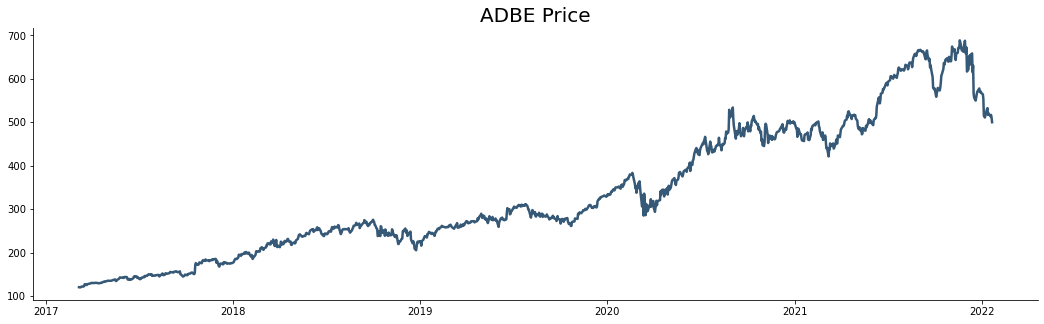

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('adbe.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('ADBE Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,ADBE
Date,
2017-03-06,120.15
2017-03-07,119.98
2017-03-08,119.60
2017-03-09,119.91
2017-03-10,121.09
...,...
2022-01-14,520.60
2022-01-18,513.34
2022-01-19,516.58


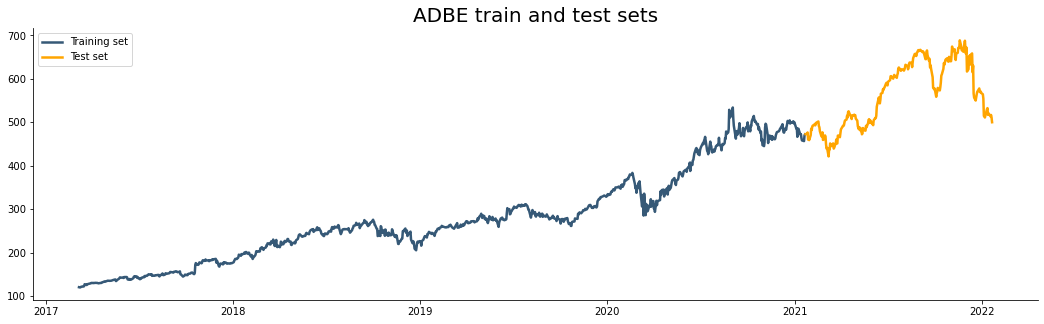

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('ADBE train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [6]:
df_train

,Date,ADBE
0,2017-03-06,120.15
1,2017-03-07,119.98
2,2017-03-08,119.60
3,2017-03-09,119.91
4,2017-03-10,121.09
...,...,...
973,2021-01-14,463.27
974,2021-01-15,458.08
975,2021-01-19,456.50
976,2021-01-20,469.73


In [7]:
df_test

,Date,ADBE
0,2021-01-22,472.44
1,2021-01-25,473.44
2,2021-01-26,476.28
3,2021-01-27,460.00
4,2021-01-28,465.67
...,...,...
248,2022-01-14,520.60
249,2022-01-18,513.34
250,2022-01-19,516.58
251,2022-01-20,510.85


In [8]:
ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'ADBE': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'ADBE': 'y'})


In [9]:
ts

,ds,y
0,2017-03-06,120.15
1,2017-03-07,119.98
2,2017-03-08,119.60
3,2017-03-09,119.91
4,2017-03-10,121.09
...,...,...
973,2021-01-14,463.27
974,2021-01-15,458.08
975,2021-01-19,456.50
976,2021-01-20,469.73


In [10]:
x_test = ts_test[['ds']]
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [11]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)
Model.fit(ts)

In [12]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()

,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [13]:
future_dates = future_dates.loc[future_dates['ds'] >= '2021-01-22']
future_dates

,ds
978,2021-01-22
979,2021-01-23
980,2021-01-24
981,2021-01-25
982,2021-01-26
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [14]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [15]:
predicitons = Model.predict(x_test)

In [16]:
predicitons

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,492.969926,483.639161,529.996072,492.969926,492.969926,13.763758,13.763758,13.763758,26.10173,...,1.632456,1.632456,1.632456,-13.970429,-13.970429,-13.970429,0.0,0.0,0.0,506.733683
1,2021-01-25,494.607494,484.523501,534.331875,494.549329,494.661945,14.892690,14.892690,14.892690,26.10173,...,0.648558,0.648558,0.648558,-11.857599,-11.857599,-11.857599,0.0,0.0,0.0,509.500184
2,2021-01-26,495.153351,486.737936,537.214755,494.993848,495.332432,16.140772,16.140772,16.140772,26.10173,...,1.181653,1.181653,1.181653,-11.142611,-11.142611,-11.142611,0.0,0.0,0.0,511.294122
3,2021-01-27,495.699207,487.828765,535.925079,495.396337,495.972554,17.084857,17.084857,17.084857,26.10173,...,1.413192,1.413192,1.413192,-10.430066,-10.430066,-10.430066,0.0,0.0,0.0,512.784064
4,2021-01-28,496.245063,487.500845,538.364194,495.799830,496.630204,18.026991,18.026991,18.026991,26.10173,...,1.649573,1.649573,1.649573,-9.724312,-9.724312,-9.724312,0.0,0.0,0.0,514.272054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,687.840608,475.788674,923.493014,470.314504,923.579383,9.184040,9.184040,9.184040,26.10173,...,1.632456,1.632456,1.632456,-18.550146,-18.550146,-18.550146,0.0,0.0,0.0,697.024648
249,2022-01-18,690.024033,483.768290,943.890072,469.441604,928.945448,10.619107,10.619107,10.619107,26.10173,...,1.181653,1.181653,1.181653,-16.664276,-16.664276,-16.664276,0.0,0.0,0.0,700.643140
250,2022-01-19,690.569889,477.876938,938.762986,468.997817,930.286965,11.434797,11.434797,11.434797,26.10173,...,1.413192,1.413192,1.413192,-16.080125,-16.080125,-16.080125,0.0,0.0,0.0,702.004687
251,2022-01-20,691.115746,475.795009,945.740956,468.273622,931.628481,12.289989,12.289989,12.289989,26.10173,...,1.649573,1.649573,1.649573,-15.461315,-15.461315,-15.461315,0.0,0.0,0.0,703.405734


In [17]:
df_test

,Date,ADBE
0,2021-01-22,472.44
1,2021-01-25,473.44
2,2021-01-26,476.28
3,2021-01-27,460.00
4,2021-01-28,465.67
...,...,...
248,2022-01-14,520.60
249,2022-01-18,513.34
250,2022-01-19,516.58
251,2022-01-20,510.85
